In [1]:
import sys
sys.path.append('..')
from src.agents import QAgent

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

[Warning] milp library not available, LP solvers will be disabled.


/home/rando/anaconda3/envs/olfactory_navigation/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

In [3]:
from src import Environment

In [4]:
data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH

env = Environment(data=data_path,
                  source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='no',
                  start_zone='odor_present',
                  odor_present_treshold=3e-6)

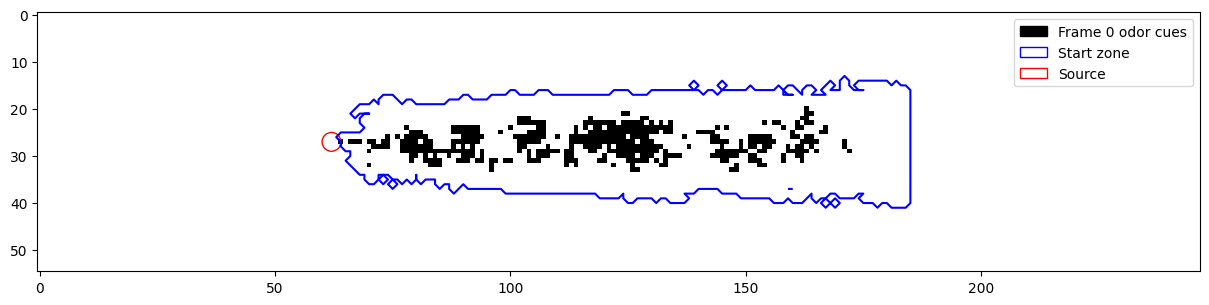

In [5]:
env.plot()

In [6]:
env.save(force=True)

Environment saved to: ./Env-55_247-edge_no-start_odor_present-source_27_62_radius2


In [18]:
memory_size = 5
time_disc = 500
horizon = 500
num_episodes=50000
delta = 500
gamma = 1.0
eps_decay = 0.00005
alpha_decay = 0.00005
eps = lambda t : 0.9 * np.exp(-eps_decay * t)  #if np.exp(-eps_decay * t)  > 0.3 else 0.3
alpha = lambda t :  np.exp(-alpha_decay * t) # if np.exp(-alpha_decay * t) > 0.0001 else 0.0001 #0.3 * np.exp(-alpha_decay * t) > 0.001 else 0.001

checkpoint_folder = "./q_agent_training/checkpoints_2"
checkpoint_frequency = 5000


ag = QAgent(env, 
            memory_size=memory_size, 
            treshold=3e-6,
            time_disc=time_disc, 
            horizon=horizon,
            num_episodes=num_episodes,
            delta=delta,
            eps_greedy= eps,
            learning_rate=alpha,
            gamma = gamma,
            seed=13141516,
            checkpoint_folder=checkpoint_folder,
            checkpoint_frequency=checkpoint_frequency
            )

In [19]:
np.random.seed(121314)
training_result = ag.train()


  3%|▎         | 1620/50000 [00:47<23:26, 34.39it/s, episode=1620, init_pos=[30 98], avg R_t=0.05, eps=0.8299743223001472, alpha=0.922193691444608]    


KeyboardInterrupt: 

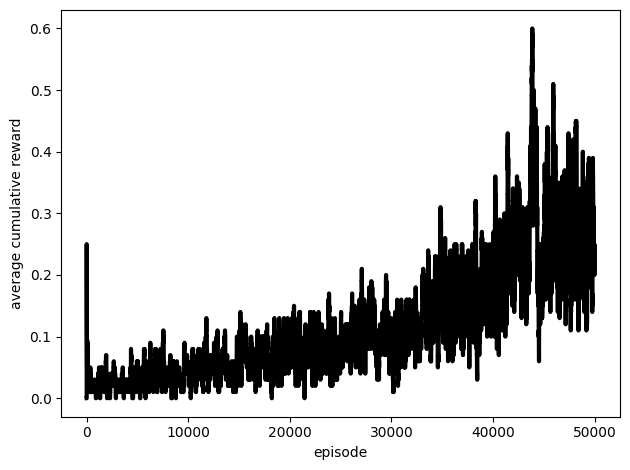

In [12]:
average_cumulative_reward = training_result['average_cumulative_reward']

fig, ax = plt.subplots()

ax.plot(range(average_cumulative_reward.shape[0]), average_cumulative_reward, '-', lw=3, c='black')

ax.set_xlabel("episode")
ax.set_ylabel("average cumulative reward")

fig.tight_layout()
fig.savefig("./training_result.pdf", bbox_inches='tight')

In [13]:
(ag.Q.argmax(axis=1) == 2).sum(), (ag.Q.argmax(axis=1) == 3).sum()

(40, 46)

In [14]:
ag.deterministic = True

In [ ]:
#ag.save("./")

In [ ]:
ag.load(".")

In [15]:
from src.simulation import run_test

hist = run_test(n=10000, agent=ag, horizon=1000, time_shift=2400,  use_gpu=False)

 20%|█▉        | 197/1000 [00:00<00:01, 553.55it/s, done =4527 of 10000 (45.3%)]

Simulations done in 0.357s:
Simulations reached goal: 4550/10000 (5450 failures) (45.50%)
	- Average step count: 138.9854 (Successfull only: 68.29758241758242)
	- Extra steps: 67.8553 (Successful only: 3.2989010989010987)
	- Average discounted rewards (ADR): 0.318 (Successfull only: 0.535) (discount: 0.99)
	- Tmin/T: 0.652 (Successful only: 0.971)


In [ ]:
hist.save()

KeyboardInterrupt: 

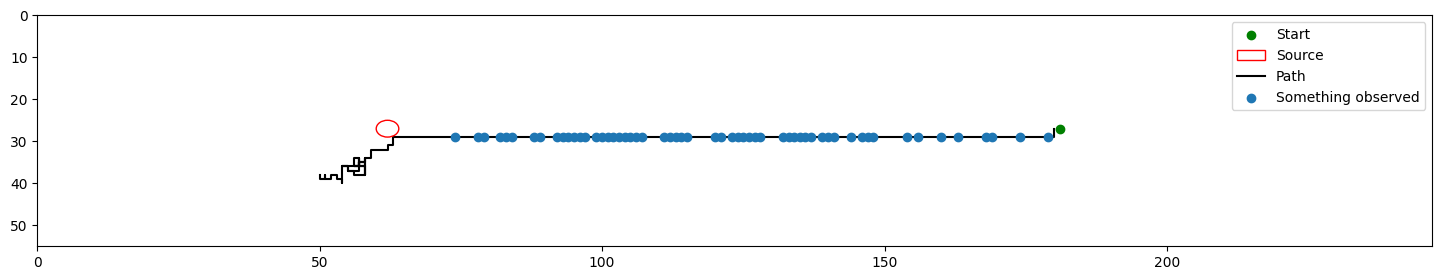

In [16]:
hist.plot(1)

In [ ]:
hist.

'Simulations reached goal: 987/1000 (13 failures) (98.70%)\n\t- Average step count: 134.712 (Successfull only: 123.31509625126647)\n\t- Extra steps: 65.352 (Successful only: 54.680851063829785)\n\t- Average discounted rewards (ADR): 0.368 (Successfull only: 0.373) (discount: 0.99)\n\t- Tmin/T: 0.649 (Successful only: 0.656)'

In [ ]:
ag.Q[0, :]

array([133.77937272, 133.71913402, 133.71757199, 133.72083726])